# Train model Bayesian Neural Network

We train and evaluate the BNN on the dataset which we loaded earlier.

Credits to Felix Laumann (https://github.com/felix-laumann/Bayesian_CNN) for the method of training BNN with Bayes by Backprop and the model code.

In [5]:
import torch
import pickle
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
import random
from torch.autograd import Variable
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import pandas as pd
from copy import copy 
from agentMET4FOF_bayesian_neural_network_ZeMA.ML_models.BBBlayers import \
    BBBLinearFactorial
from agentMET4FOF_bayesian_neural_network_ZeMA.ML_models.BBBlayers import GaussianVariationalInference
from agentMET4FOF_bayesian_neural_network_ZeMA.ML_models.BNN_Wrapper import BNN_Wrapper
from agentMET4FOF_bayesian_neural_network_ZeMA.ML_models.BNN_Wrapper import BNN_Full
import seaborn as sns

from scipy.stats import skew
from scipy.stats import kurtosis 
from scipy.stats import sem
from scipy.fftpack import fft
from sklearn.metrics import f1_score

## Load data and label outputs

In [6]:
pickle_path="pickles/"
data_input = pickle.load( open( pickle_path+"data_input_data_1Hz_full.p", "rb" ) )
data_output = pickle.load( open( pickle_path+"zema_outputs.p", "rb" ) )

output_labels = [{0: "Optimal", 1: "Reduced", 2: "Nearly Fail"},
 {0: "Optimal", 1: "Small lag", 2: "Severe lag", 3: "Nearly Fail"},
 {0: "No Leakage", 1: "Weak Leakage", 2: "Severe Leakage"},
 {0: "Optimal", 1: "Slightly Reduced", 2: "Severely Reduced", 3: "Nearly Fail"},
 {0: "Stable", 1: "Unstable"}]
output_sizes = [3,4,3,4,2]


## Initialization

Setup parameters such as learning rate, number of Monte Carlo samples during predictions, training epoch, certainty threshold 



In [7]:
learning_rate = 0.005
num_samples = 50
num_epochs = 300
certainty_threshold  = 80

X_data = data_input
Y_data = data_output


## Shuffle data
1. Shuffle data randomly to have a random distribution
2. Split the time series into segments if necessary (n=1 means no segmentation occurs)

In [8]:
randomShuffling= True

#randomShuffling
if(randomShuffling == True):
    index_list = np.arange(X_data.shape[0])
    random.shuffle(index_list)
    Y_data=Y_data[index_list,:]
    X_data=X_data[index_list,:,:]

def split_segment(X_data,split_n =1):
    X_data_split=np.split(X_data,split_n,axis=1)
    X_data_split=np.moveaxis(X_data_split, 0, -2)
    X_data_split=X_data_split.reshape((X_data_split.shape[0],X_data_split.shape[1],-1))
    return X_data_split

X_data=split_segment(X_data)

## Train and evaluate data in k-fold validation
* Setup empty arrays for keeping results from each k-fold validation iteration

* Training consists of two loops:
    1. Outer loop: Train a model for each prediction task (from valve, pump, accumulator, etc)
    2. Inner loop: k-fold iteration
    
* Results are stored in arrays 

[ 441  442  443 ... 2202 2203 2204] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 23

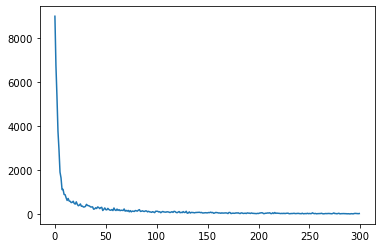

<Figure size 432x288 with 0 Axes>

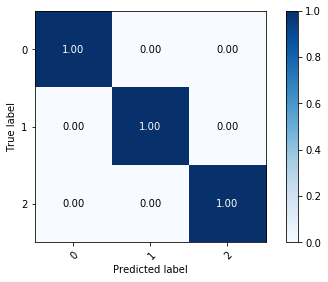

<Figure size 432x288 with 0 Axes>

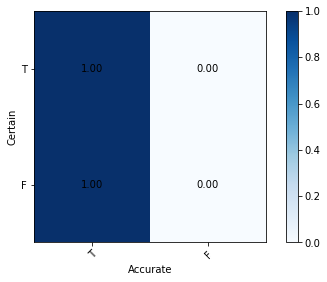

<Figure size 432x288 with 0 Axes>

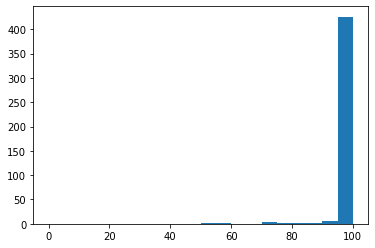

<Figure size 432x288 with 0 Axes>

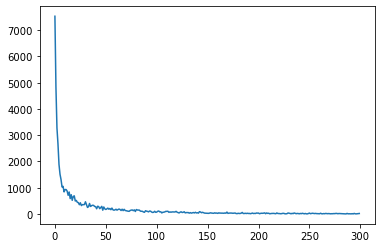

<Figure size 432x288 with 0 Axes>

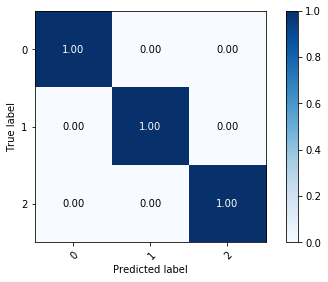

<Figure size 432x288 with 0 Axes>

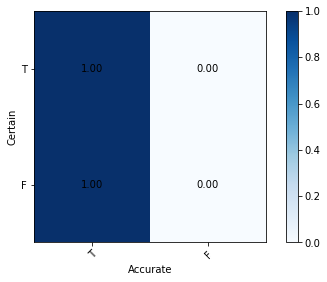

<Figure size 432x288 with 0 Axes>

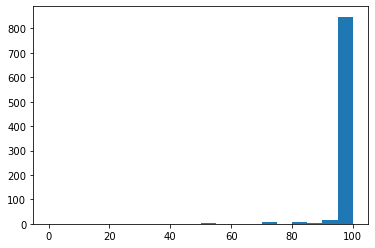

<Figure size 432x288 with 0 Axes>

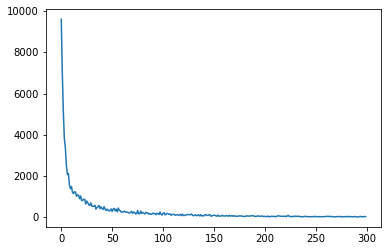

<Figure size 432x288 with 0 Axes>

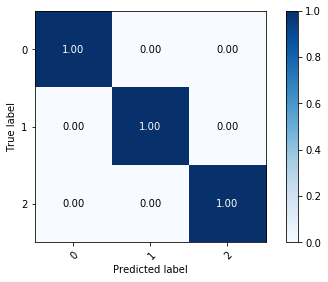

<Figure size 432x288 with 0 Axes>

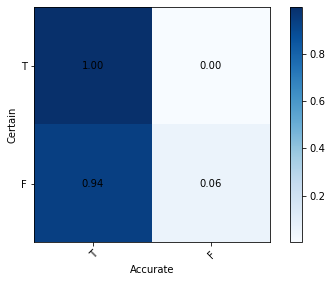

<Figure size 432x288 with 0 Axes>

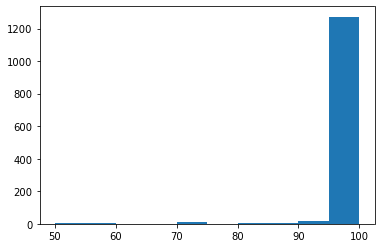

<Figure size 432x288 with 0 Axes>

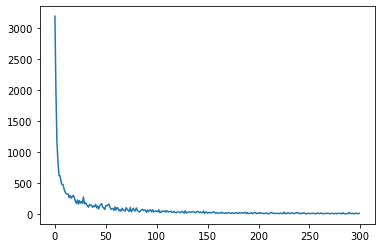

<Figure size 432x288 with 0 Axes>

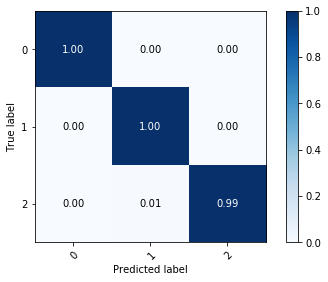

<Figure size 432x288 with 0 Axes>

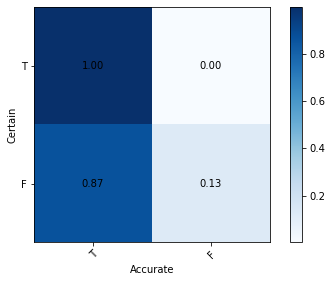

<Figure size 432x288 with 0 Axes>

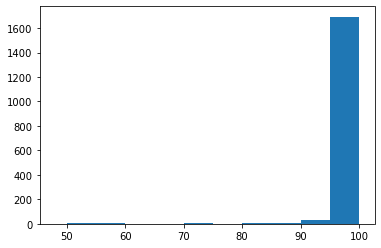

<Figure size 432x288 with 0 Axes>

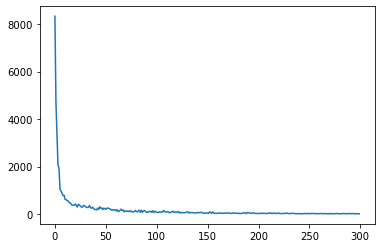

<Figure size 432x288 with 0 Axes>

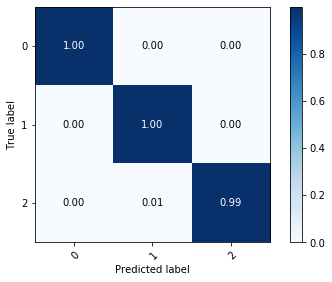

<Figure size 432x288 with 0 Axes>

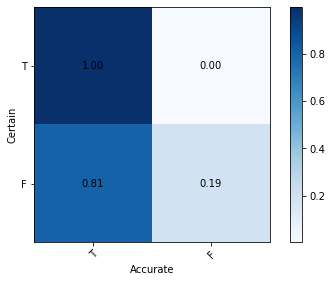

<Figure size 432x288 with 0 Axes>

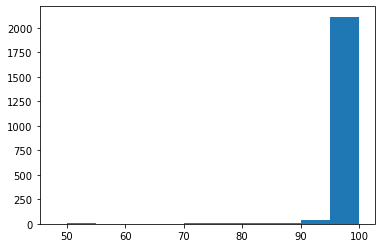

/home/ludwig10/code/envs/agentMET4FOF_use-case_zema-bnn/lib/python3.8/site-packages/torch/storage.py:34: FutureWarning: pickle support for Storage will be removed in 1.5. Use `torch.save` instead
  warnings.warn("pickle support for Storage will be removed in 1.5. Use `torch.save` instead", FutureWarning)
/home/ludwig10/code/envs/agentMET4FOF_use-case_zema-bnn/lib/python3.8/site-packages/torch/storage.py:34: FutureWarning: pickle support for Storage will be removed in 1.5. Use `torch.save` instead
  warnings.warn("pickle support for Storage will be removed in 1.5. Use `torch.save` instead", FutureWarning)
/home/ludwig10/code/envs/agentMET4FOF_use-case_zema-bnn/lib/python3.8/site-packages/torch/storage.py:34: FutureWarning: pickle support for Storage will be removed in 1.5. Use `torch.save` instead
  warnings.warn("pickle support for Storage will be removed in 1.5. Use `torch.save` instead", FutureWarning)
/home/ludwig10/code/envs/agentMET4FOF_use-case_zema-bnn/lib/python3.8/site-package

<Figure size 432x288 with 0 Axes>

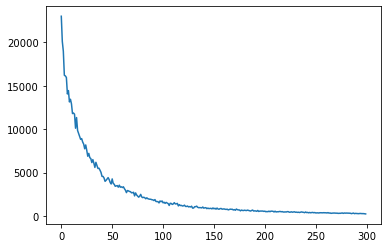

<Figure size 432x288 with 0 Axes>

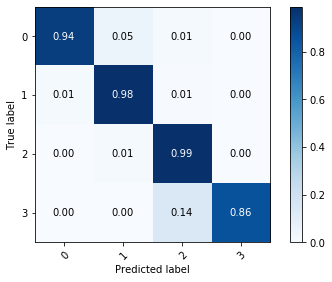

<Figure size 432x288 with 0 Axes>

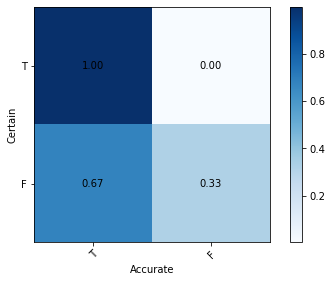

<Figure size 432x288 with 0 Axes>

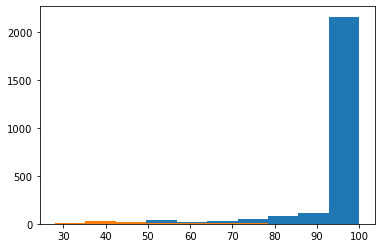

<Figure size 432x288 with 0 Axes>

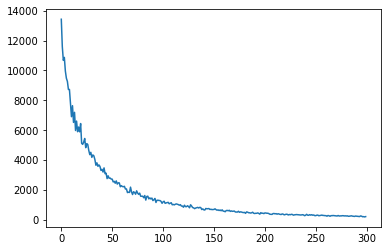

<Figure size 432x288 with 0 Axes>

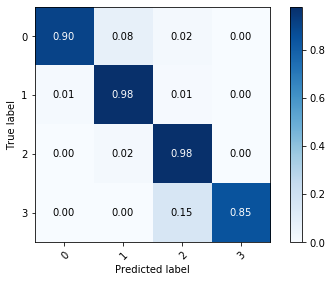

<Figure size 432x288 with 0 Axes>

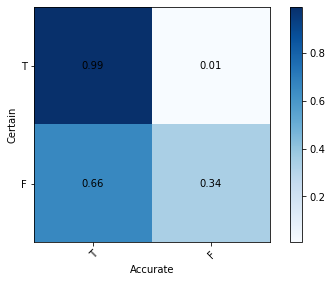

<Figure size 432x288 with 0 Axes>

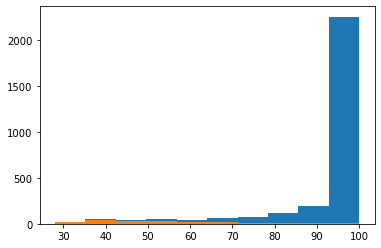

<Figure size 432x288 with 0 Axes>

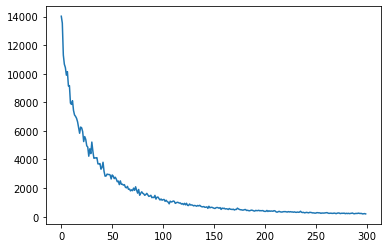

<Figure size 432x288 with 0 Axes>

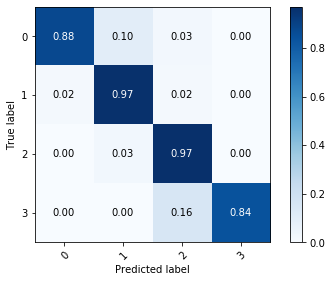

<Figure size 432x288 with 0 Axes>

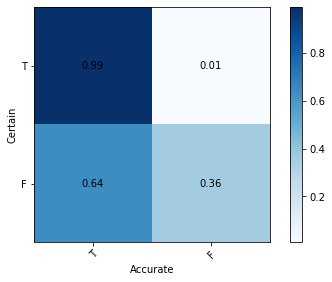

<Figure size 432x288 with 0 Axes>

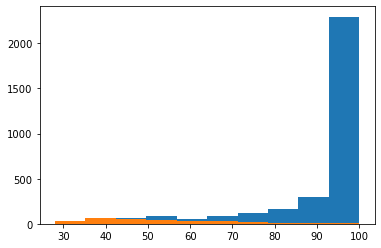

<Figure size 432x288 with 0 Axes>

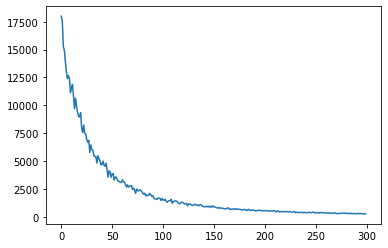

<Figure size 432x288 with 0 Axes>

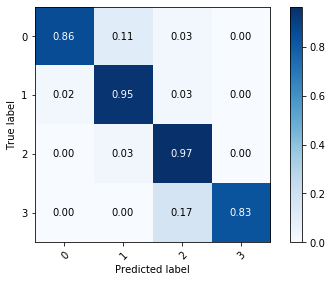

<Figure size 432x288 with 0 Axes>

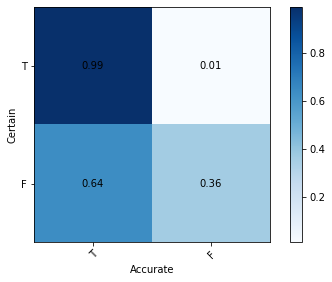

<Figure size 432x288 with 0 Axes>

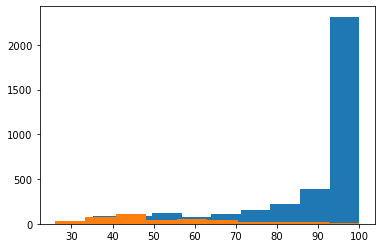

<Figure size 432x288 with 0 Axes>

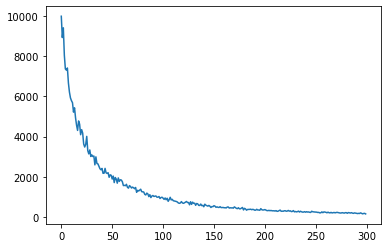

<Figure size 432x288 with 0 Axes>

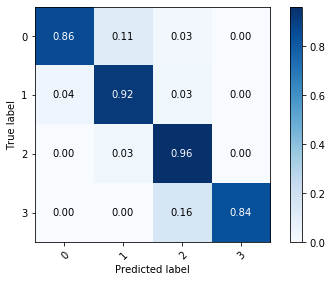

<Figure size 432x288 with 0 Axes>

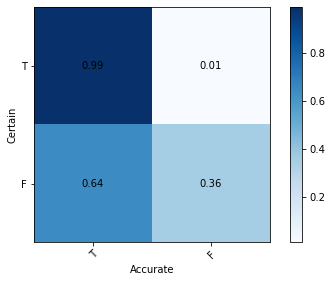

<Figure size 432x288 with 0 Axes>

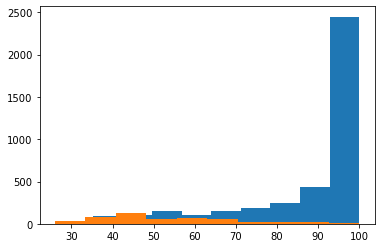

<Figure size 432x288 with 0 Axes>

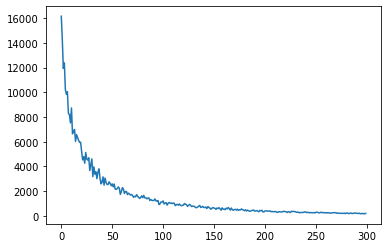

<Figure size 432x288 with 0 Axes>

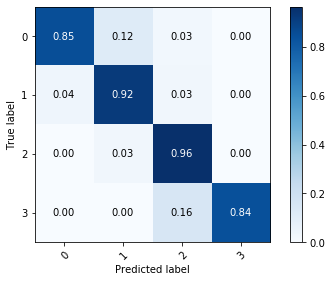

<Figure size 432x288 with 0 Axes>

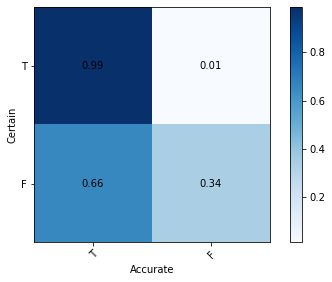

<Figure size 432x288 with 0 Axes>

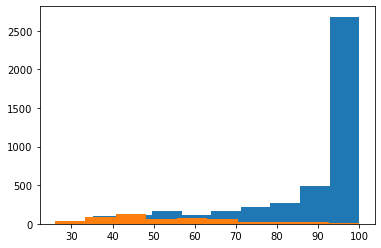

<Figure size 432x288 with 0 Axes>

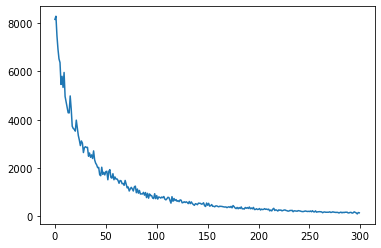

<Figure size 432x288 with 0 Axes>

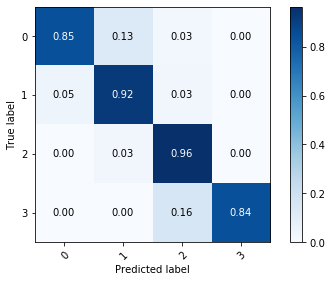

<Figure size 432x288 with 0 Axes>

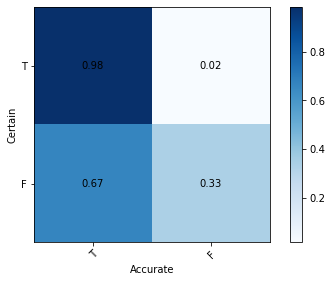

<Figure size 432x288 with 0 Axes>

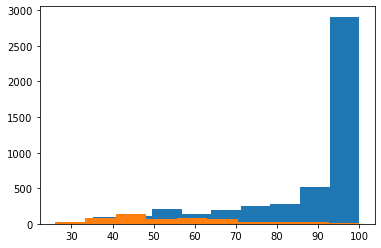

<Figure size 432x288 with 0 Axes>

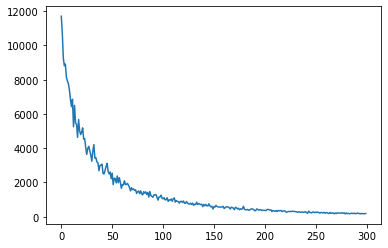

<Figure size 432x288 with 0 Axes>

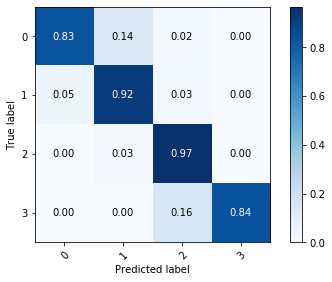

<Figure size 432x288 with 0 Axes>

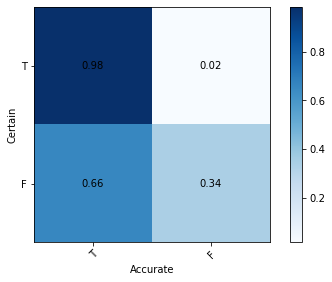

<Figure size 432x288 with 0 Axes>

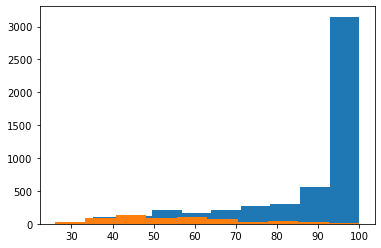

<Figure size 432x288 with 0 Axes>

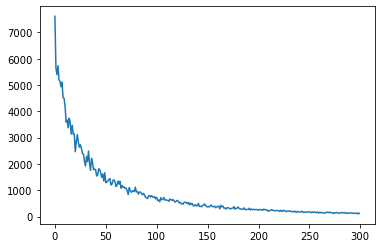

<Figure size 432x288 with 0 Axes>

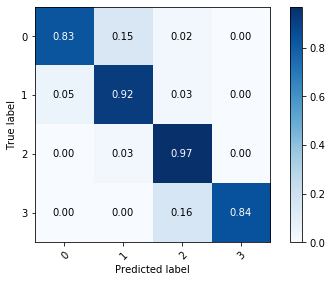

<Figure size 432x288 with 0 Axes>

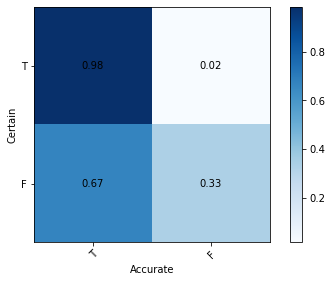

<Figure size 432x288 with 0 Axes>

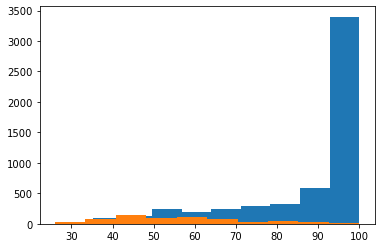

<Figure size 432x288 with 0 Axes>

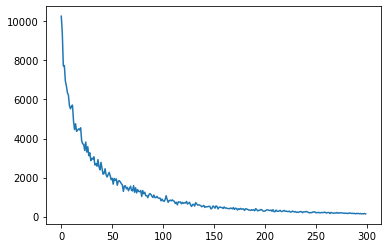

<Figure size 432x288 with 0 Axes>

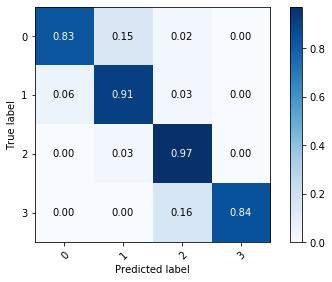

<Figure size 432x288 with 0 Axes>

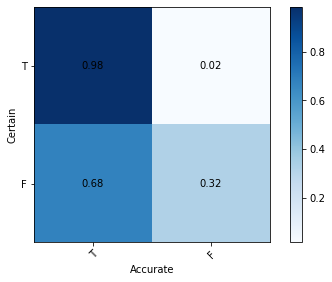

<Figure size 432x288 with 0 Axes>

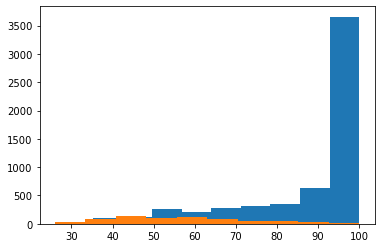

<Figure size 432x288 with 0 Axes>

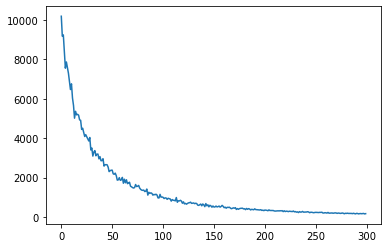

<Figure size 432x288 with 0 Axes>

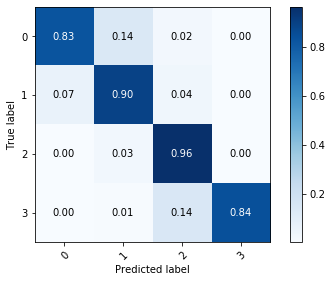

<Figure size 432x288 with 0 Axes>

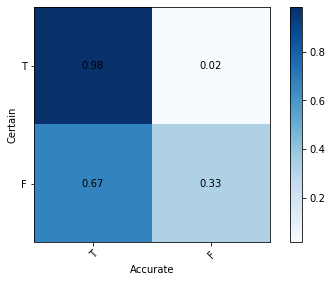

<Figure size 432x288 with 0 Axes>

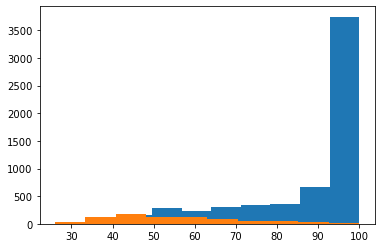

<Figure size 432x288 with 0 Axes>

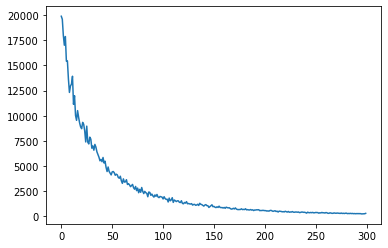

<Figure size 432x288 with 0 Axes>

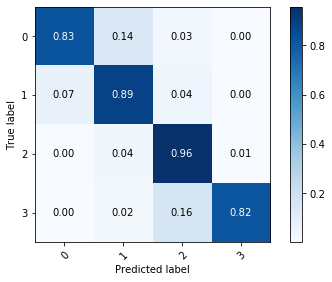

<Figure size 432x288 with 0 Axes>

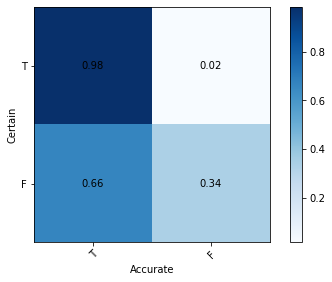

<Figure size 432x288 with 0 Axes>

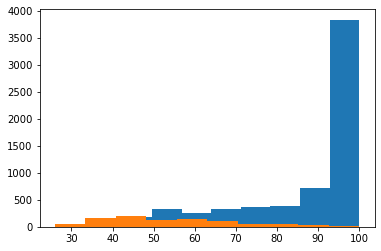

<Figure size 432x288 with 0 Axes>

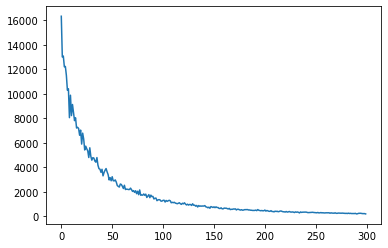

<Figure size 432x288 with 0 Axes>

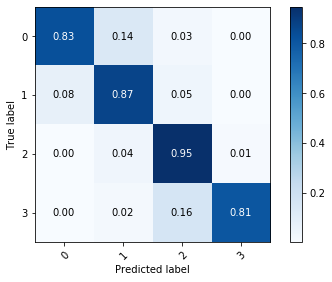

<Figure size 432x288 with 0 Axes>

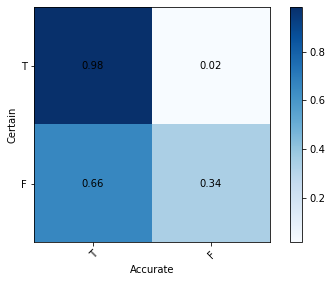

<Figure size 432x288 with 0 Axes>

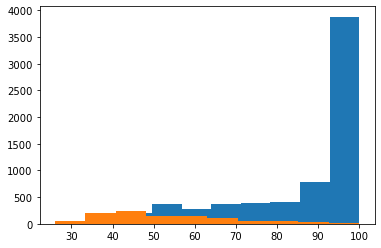

<Figure size 432x288 with 0 Axes>

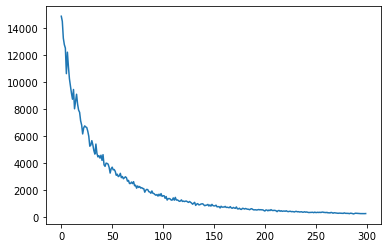

<Figure size 432x288 with 0 Axes>

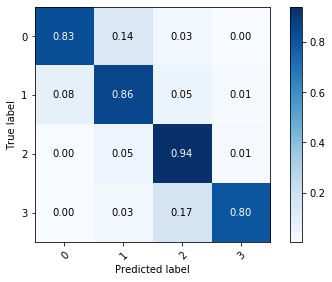

<Figure size 432x288 with 0 Axes>

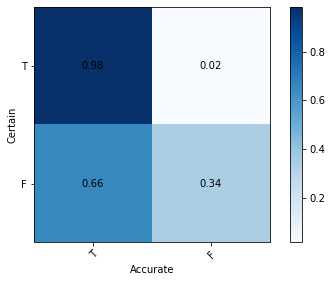

<Figure size 432x288 with 0 Axes>

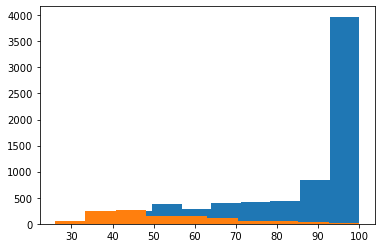

<Figure size 432x288 with 0 Axes>

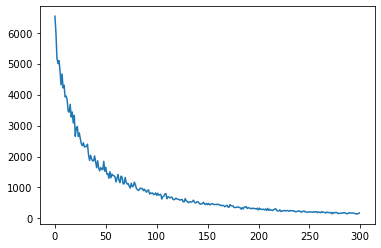

<Figure size 432x288 with 0 Axes>

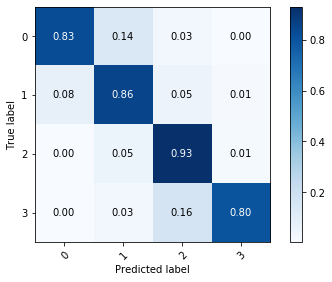

<Figure size 432x288 with 0 Axes>

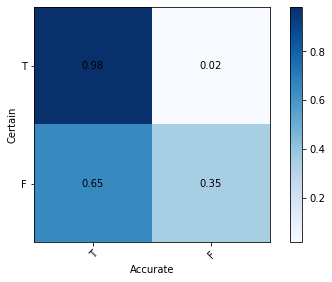

<Figure size 432x288 with 0 Axes>

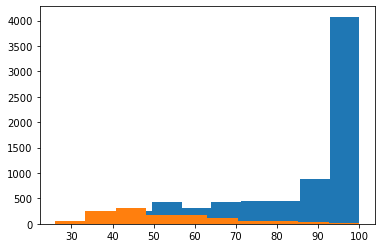

<Figure size 432x288 with 0 Axes>

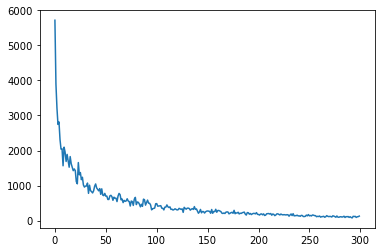

<Figure size 432x288 with 0 Axes>

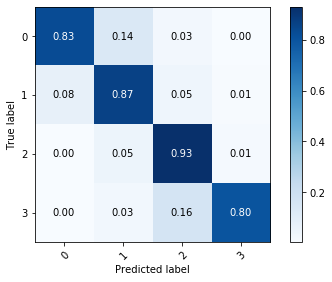

<Figure size 432x288 with 0 Axes>

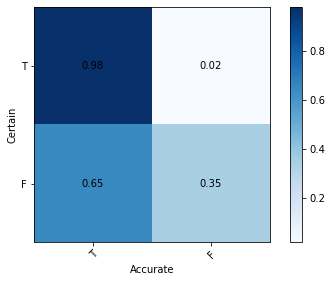

<Figure size 432x288 with 0 Axes>

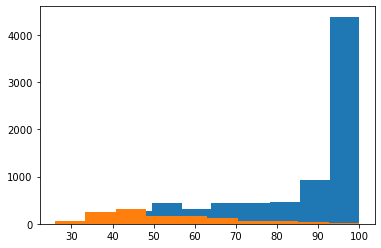

<Figure size 432x288 with 0 Axes>

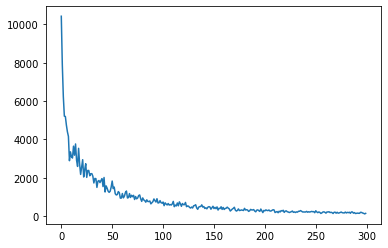

<Figure size 432x288 with 0 Axes>

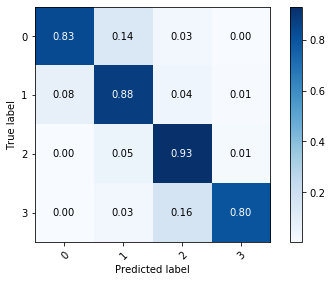

<Figure size 432x288 with 0 Axes>

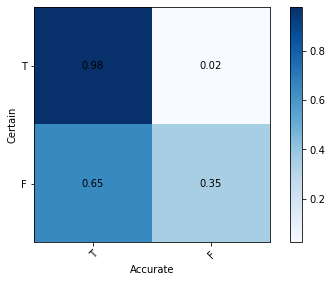

<Figure size 432x288 with 0 Axes>

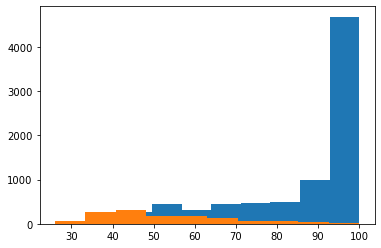

<Figure size 432x288 with 0 Axes>

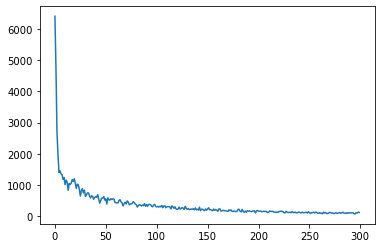

<Figure size 432x288 with 0 Axes>

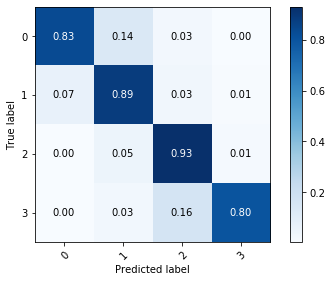

<Figure size 432x288 with 0 Axes>

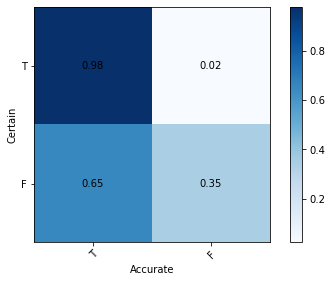

<Figure size 432x288 with 0 Axes>

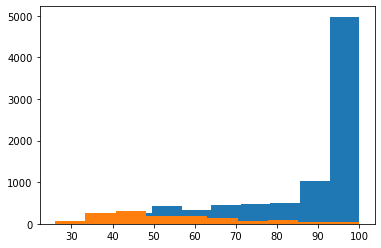

<Figure size 432x288 with 0 Axes>

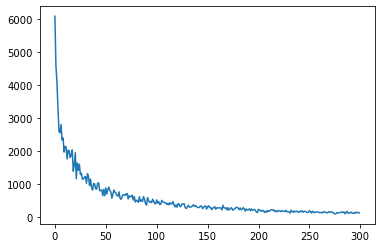

<Figure size 432x288 with 0 Axes>

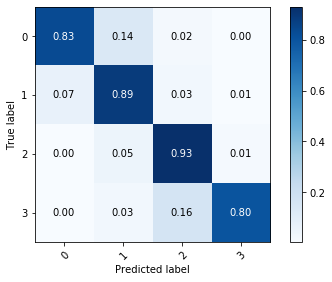

<Figure size 432x288 with 0 Axes>

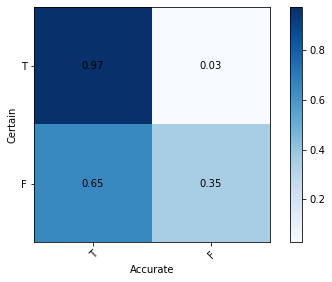

<Figure size 432x288 with 0 Axes>

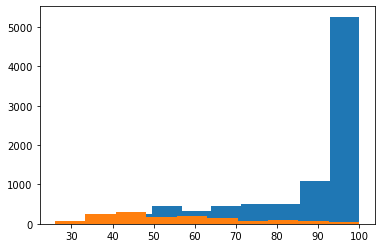

<Figure size 432x288 with 0 Axes>

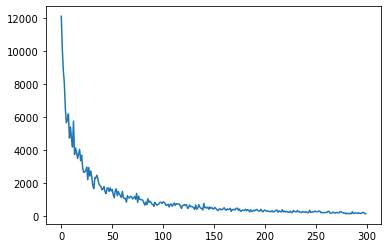

<Figure size 432x288 with 0 Axes>

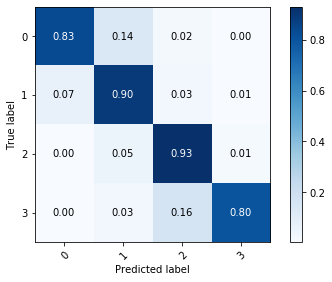

<Figure size 432x288 with 0 Axes>

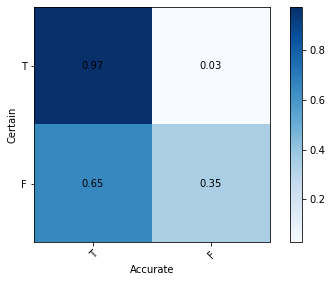

<Figure size 432x288 with 0 Axes>

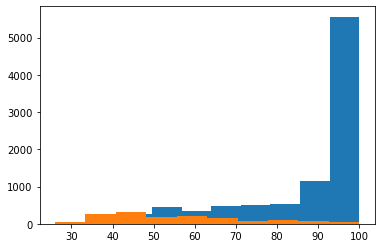

<Figure size 432x288 with 0 Axes>

In [9]:
simulate_broken_sensor = False #experimental and not fully implemented yet

y_pred_kfold =[]
y_actuals_kfold=[]
mse_kfold=[]
certainties_kfold=[]
confidences_kfold=[]
DL_model_kfold =[]
final_results =[]


for target in range(len(output_sizes)):
    selected_output = target
    output_size =output_sizes[selected_output]
    bnn_wrapper = BNN_Wrapper(BNN_Full,output_size=output_size)
    
    kfold_times = 0
    kfold_limit = 5
    #kfold validation training
    kf = KFold(n_splits=5)
    f1_score_model_kfold=[]
    p_accurate_certain_kfold=[]
    p_accurate_uncertain_kfold=[]
    
    for train, test in kf.split(X_data,y=Y_data):
        
        if(kfold_times >kfold_limit):
            break
        print("%s %s" % (train, test))
        
    
        x_train=X_data[train]
        y_train=Y_data[train,selected_output]
        x_test=X_data[test]
        y_test=Y_data[test,selected_output]
        
        #simulate broken sensors on test set
        if simulate_broken_sensor == True:
            x_test_brokenSensor = Variable(torch.from_numpy(x_test).float()).repeat(x_train.shape[-1]+1,1,1,1)    
            for corrupted_sensor in range(x_train.shape[-1]):
                x_test_brokenSensor[corrupted_sensor,:,:,corrupted_sensor] =torch.randn_like(x_test_brokenSensor[corrupted_sensor,:,:,corrupted_sensor]) 
            x_test_brokenSensor = x_test_brokenSensor.view(-1,x_test_brokenSensor.shape[2],x_test_brokenSensor.shape[3])
            x_test_brokenSensor = x_test_brokenSensor.cpu().detach().numpy()
            x_test = copy(x_test_brokenSensor)
        
        
        y_test_tensor = Variable(torch.from_numpy(y_test).long())   
        if simulate_broken_sensor == True:
            y_test_tensor_repeated = y_test_tensor.repeat(x_train.shape[-1]+1,1)
            y_test_tensor_repeated = y_test_tensor_repeated.view(-1)    
        elif simulate_broken_sensor == False:
            y_test_tensor_repeated = y_test_tensor
    
        #perform feature extraction on train and test
        df_feats_train = bnn_wrapper.extract_features(x_train)
        x_train = df_feats_train.values 
        df_feats_test = bnn_wrapper.extract_features(x_test)
        x_test = df_feats_test.values 
        
        #train model
        bnn_wrapper.train_model(x_train,y_train,learning_rate= learning_rate,num_epochs = num_epochs)
    
        #predict using model
        y_pred_test,certainties,confidences = bnn_wrapper.predict_model_wUnc(x_test,num_samples=num_samples)
        
        #now form all the kfolds  
        DL_model_kfold.append(bnn_wrapper.trained_model)
        y_pred_kfold.append(y_pred_test)
        y_actuals_kfold.append(y_test_tensor_repeated.cpu().detach().numpy())
        certainties_kfold.append(np.array(certainties))
        confidences_kfold.append(np.array(confidences))
        kfold_times = kfold_times+1
        
        #evaluate model
        y_true_np=np.array(y_actuals_kfold).reshape(-1)
        y_pred_np=np.array(y_pred_kfold).reshape(-1)
        certainties_np = np.array(certainties_kfold).reshape(-1)
        
        f1_score_model, p_accurate_certain, p_accurate_uncertain = bnn_wrapper.evaluate_model(y_true_np,y_pred_np,certainties_np,certainty_threshold=certainty_threshold)
        f1_score_model_kfold.append(f1_score_model)
        p_accurate_certain_kfold.append(p_accurate_certain)
        p_accurate_uncertain_kfold.append(p_accurate_uncertain)
    
    print("Target output: ", selected_output)
    print("F1 SCORE: ",np.mean(f1_score_model_kfold),"+-",sem(f1_score_model_kfold), f1_score_model_kfold)
    print("P(Acc | Certain): ",np.mean(p_accurate_certain_kfold),"+-",sem(p_accurate_certain_kfold),p_accurate_certain_kfold)
    print("P(Acc | Uncertain): ",np.mean(p_accurate_uncertain_kfold),"+-",sem(p_accurate_uncertain_kfold),p_accurate_uncertain_kfold)

    final_results.append([f1_score_model_kfold, p_accurate_certain_kfold, p_accurate_uncertain_kfold])
    
    pickle.dump(bnn_wrapper, open( pickle_path+"bnn_wrapper_"+str(selected_output)+".p", "wb" ) )


In [10]:
# print results
task_names = ["Cooler Condition", "Valve Condition", "Internal Pump Leakage", "Accumulator", "Stable Flag"]

for i in range(len(final_results)):
    f1_score_model_kfold = final_results[i][0]
    p_accurate_certain_kfold = final_results[i][1]
    p_accurate_uncertain_kfold = final_results[i][2]
    print("Target output: ", task_names[i])
    print("F1 SCORE: ",np.mean(f1_score_model_kfold),"+-",sem(f1_score_model_kfold), f1_score_model_kfold)
    print("P(Acc | Certain): ",np.mean(p_accurate_certain_kfold),"+-",sem(p_accurate_certain_kfold),p_accurate_certain_kfold)
    print("P(Acc | Uncertain): ",np.mean(p_accurate_uncertain_kfold),"+-",sem(p_accurate_uncertain_kfold),p_accurate_uncertain_kfold)
    print("\n")


Target output:  Cooler Condition
F1 SCORE:  0.9982237339380197 +- 0.0008692365835222947 [1.0, 1.0, 0.99848828420257, 0.9971655328798186, 0.9954648526077098]
P(Acc | Certain):  0.9992492395156856 +- 0.0003515806166272166 [1.0, 1.0, 0.9992348890589136, 0.9988512349224583, 0.9981600735970562]
P(Acc | Uncertain):  0.9227033660589059 +- 0.03775355120304781 [1.0, 1.0, 0.9375, 0.8695652173913043, 0.8064516129032258]


Target output:  Valve Condition
F1 SCORE:  0.921844473239031 +- 0.012920371133055457 [0.9625850340136054, 0.938127632005183, 0.9169501133786848, 0.8997228521038045, 0.8918367346938776]
P(Acc | Certain):  0.9922530074751605 +- 0.001413459650009784 [0.9970376639864579, 0.9930232558139535, 0.9924269743959611, 0.9895128552097429, 0.9892642879696874]
P(Acc | Uncertain):  0.6509475673619074 +- 0.007037270778982305 [0.6749116607773852, 0.6587771203155819, 0.6397350993377483, 0.6377097729516288, 0.6436041834271923]


Target output:  Internal Pump Leakage
F1 SCORE:  0.8925049629131262 +-